# TASK 4  
## To Explore Decision Tree Algorithm

### Importing the libraries

In [60]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the  dataset

In [61]:
df = pd.read_csv('Iris.csv')
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [62]:
dfc=pd.DataFrame(df["SepalWidthCm"])
dfc["SepalLengthCm"]=df["SepalLengthCm"]
dfc["PetalLengthCm"]=df["PetalLengthCm"]
dfc["PetalWidthCm"]=df["PetalWidthCm"]

In [63]:
dy=pd.DataFrame(df["Species"])

### Encoding the species column

In [96]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
dy['Species']= label_encoder.fit_transform(dy['Species']) 
  
dy['Species'].unique() 

array([0, 1, 2])

In [97]:
dy

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


### Defining the decision tree algorithm

In [98]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(dfc,dy)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


In [65]:
dfc.columns

Index(['SepalWidthCm', 'SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

### Visualize the graph

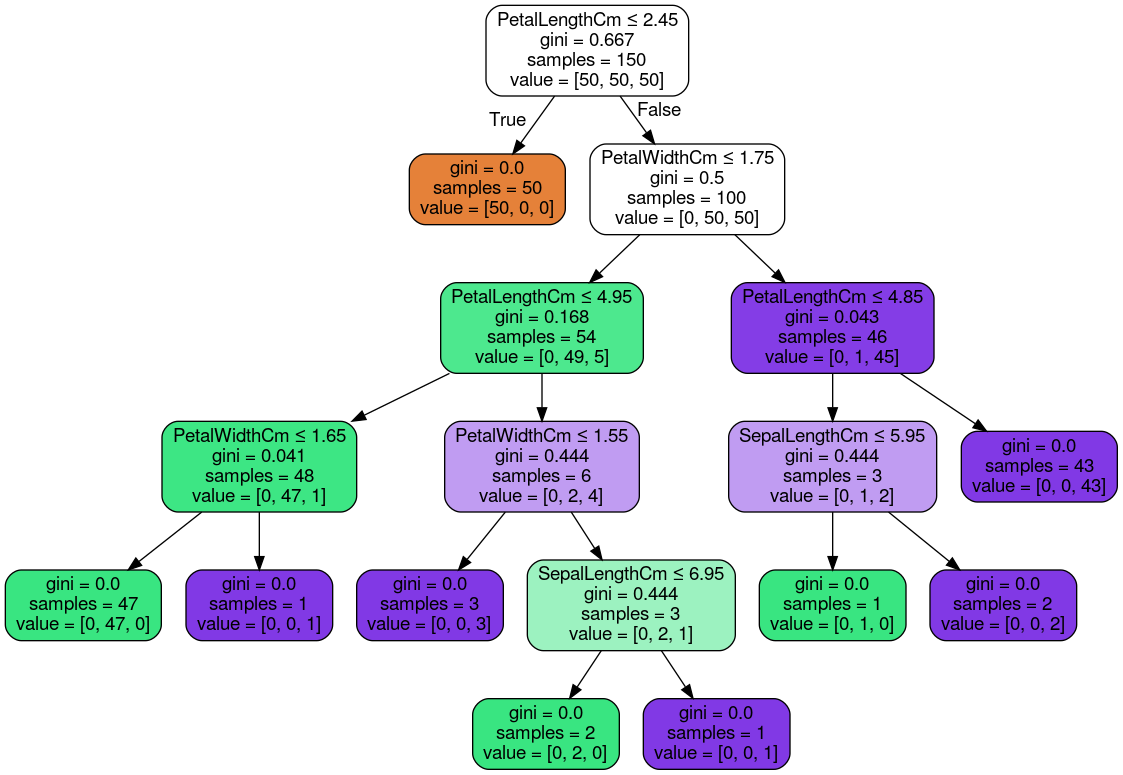

In [99]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=dfc.columns,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [67]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Splitting the datasets

In [100]:
X = dfc.iloc[:, :].values
y = dy.iloc[:, :].values
print(X.shape,y.shape)

(150, 4) (150, 1)


### Fitting the classifier

In [101]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [102]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [103]:

# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

### Predicting the Test set results

In [104]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)


### Evaluating the algorithm performance

In [105]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

In [118]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9736842105263158